# Library imports

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from scipy import stats

from sklearn.inspection import permutation_importance

# Data import and exploration

In [44]:
hr_df = pd.read_csv('data/HR_comma_sep.csv')

In [45]:
hr_df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [46]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
hr_df.isnull().sum().sort_values(ascending=False)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is no missing data in the dataframe and two columns are oject types

In [48]:
hr_df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [49]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

No null data to replace. Two data with categories that can be transformed as numerical features.

# Distribution of employees

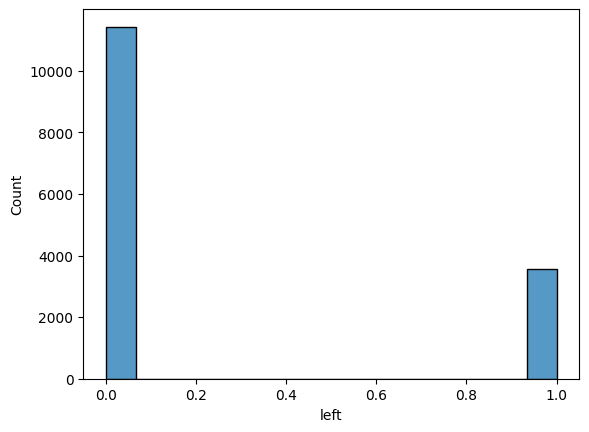

In [50]:
sns.histplot(hr_df["left"])
plt.show;

In [51]:
distrib=hr_df.groupby('left')['left'].count()/hr_df['left'].count()*100
print(f"the distribution is {int(distrib[0])}% for stayed employees and {int(distrib[1])} % for the left ones.")

the distribution is 76% for stayed employees and 23 % for the left ones.


# Feature encoding of Sales and Salary

To transform word data to process it as numerical data

Ordinal encoding to categorize salary : low=0 , medium=1, high=2

In [52]:
ordinal_encoder = OrdinalEncoder(categories = [["low","medium","high"]])
ordinal_encoder.fit(hr_df[["salary"]])
display(ordinal_encoder.categories_)
hr_df["encoded_salary"] = ordinal_encoder.transform(hr_df[["salary"]])

hr_df.drop(columns=['salary'],inplace=True)

[array(['low', 'medium', 'high'], dtype=object)]

Label encoder is used for the Sales data as it has multiple possibilities with no ranking

In [53]:
label_encoder = LabelEncoder()
label_encoder.fit(hr_df['sales'])
encoded_target = label_encoder.transform(hr_df['sales'])
hr_df["encoded_sales"] = encoded_target

print("Codes for Sales are the following:")
print(pd.concat([hr_df["sales"],hr_df["encoded_sales"]],axis=1).drop_duplicates())



Codes for Sales are the following:
           sales  encoded_sales
0          sales              7
28    accounting              2
31            hr              3
35     technical              9
46       support              8
60    management              4
61            IT              0
66   product_mng              6
77     marketing              5
301        RandD              1


In [54]:
hr_df.drop(columns=['sales'],inplace=True)

In [55]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,encoded_salary,encoded_sales
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706,5.870525
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,2.868786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,7.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,8.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,9.000000


# Feature exploration

----- Distribution of satisfaction_level : -----


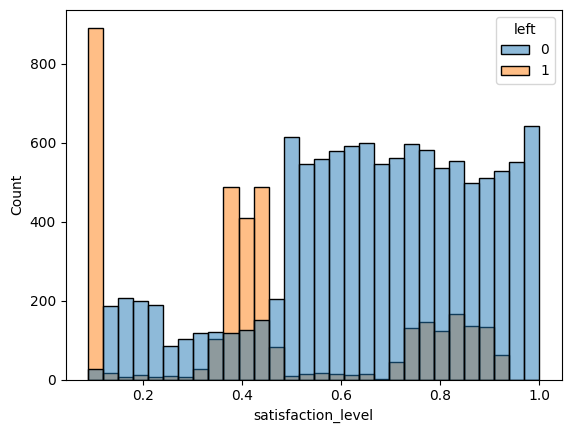

----- Distribution of last_evaluation : -----


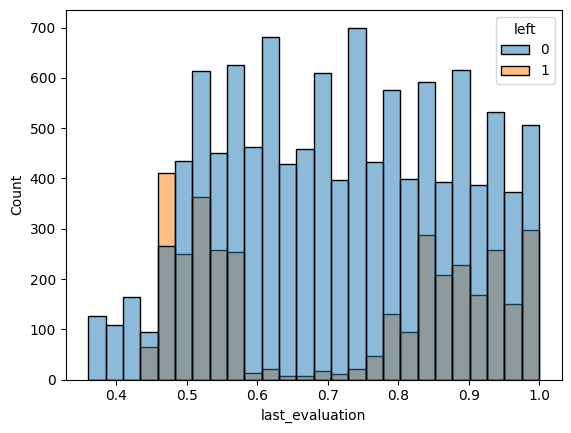

----- Distribution of number_project : -----


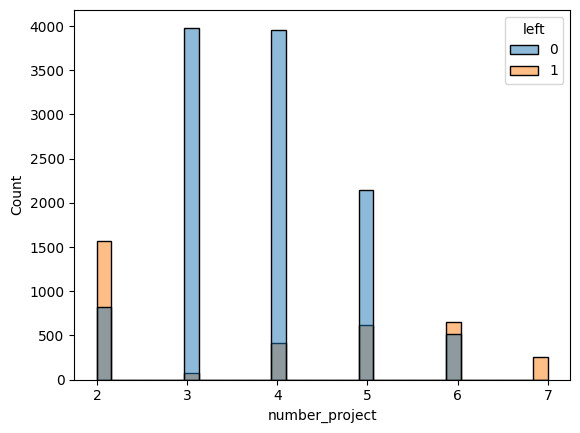

----- Distribution of average_montly_hours : -----


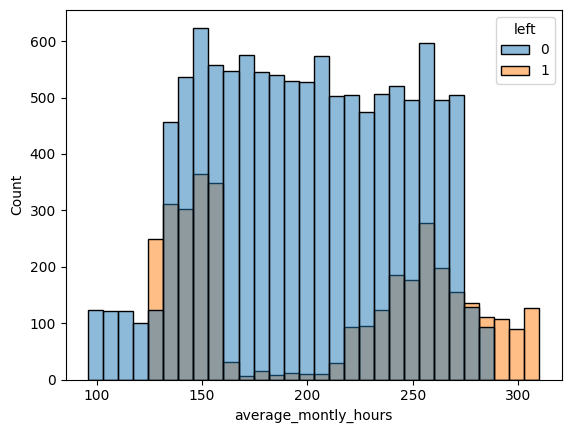

----- Distribution of time_spend_company : -----


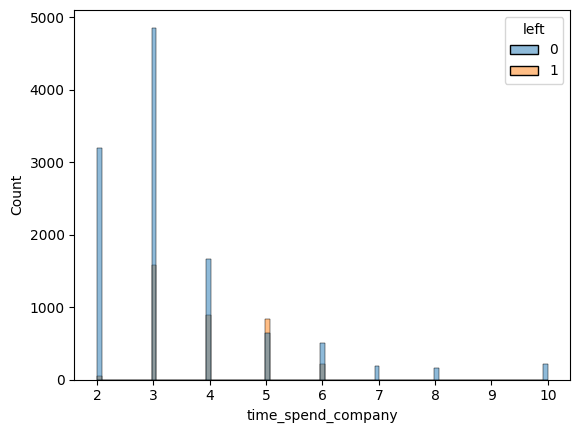

----- Distribution of Work_accident : -----


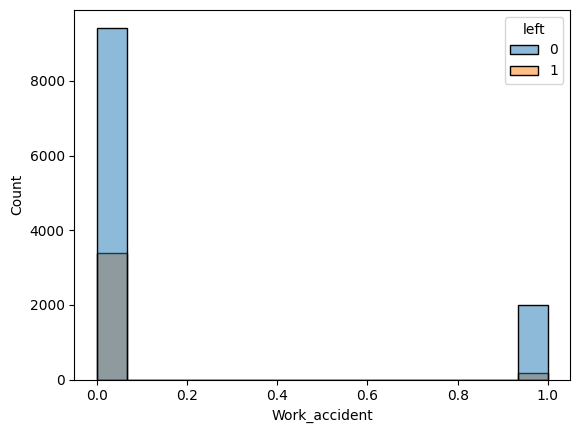

----- Distribution of left : -----


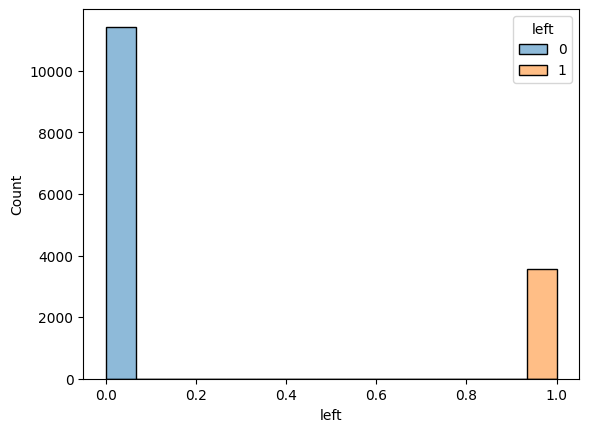

----- Distribution of promotion_last_5years : -----


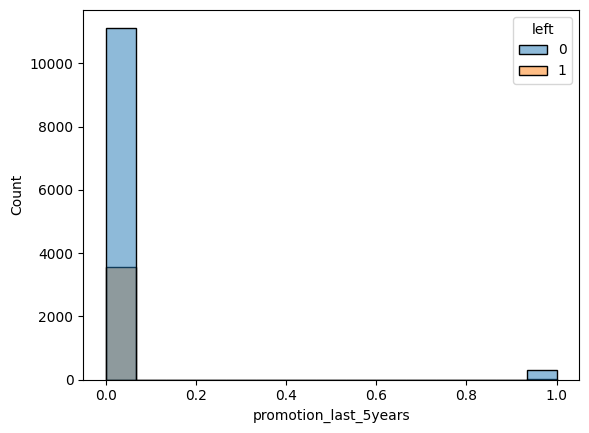

----- Distribution of encoded_salary : -----


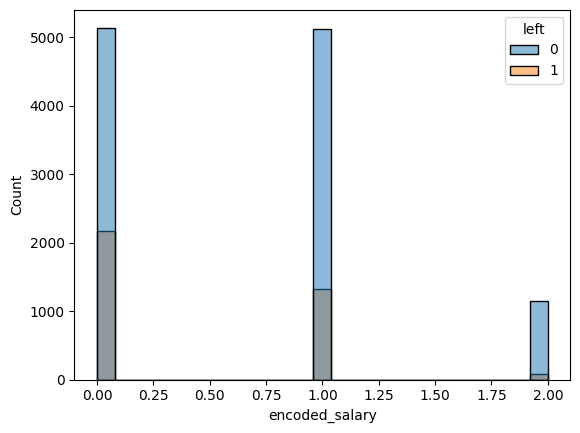

----- Distribution of encoded_sales : -----


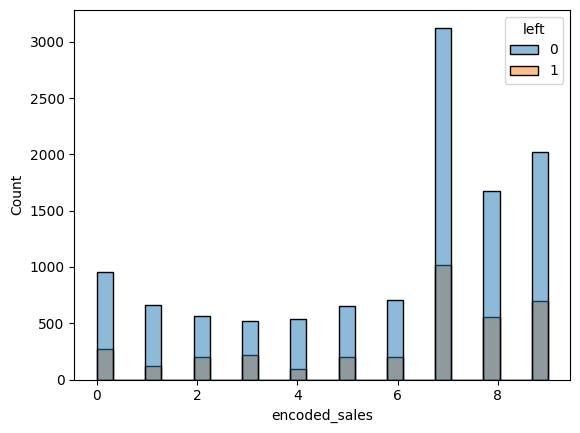

In [56]:
for variable in hr_df.select_dtypes(exclude = ["object"]).columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(x=hr_df[variable],hue=hr_df['left'])
    plt.show()

Left people seems to work in all fields of sales, they had no or less promotion on the last 5 years, they tend to have a low salary.

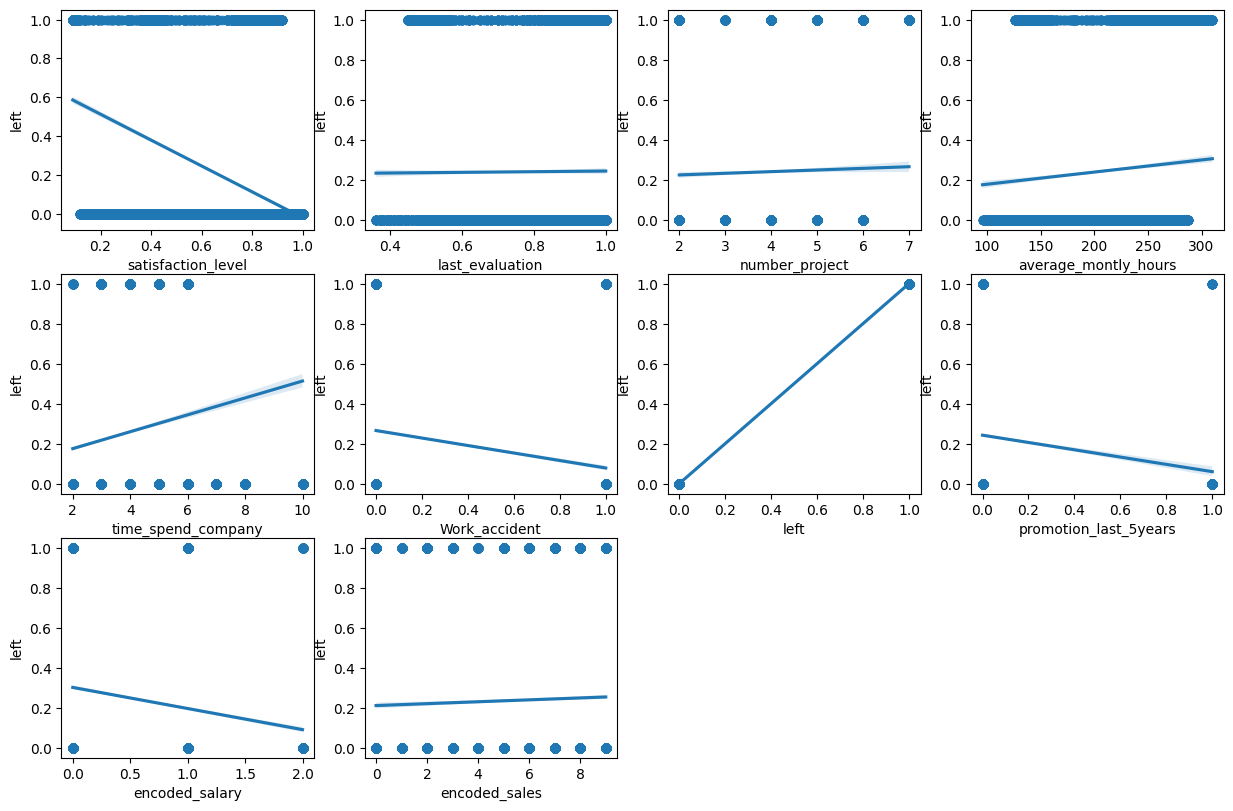

In [57]:
plt.figure(figsize=(15,20))
for (i,variable) in enumerate(hr_df.select_dtypes(exclude = ["object"]).columns):
    plt.subplot(6,4,i+1)
    sns.regplot(data=hr_df,x=hr_df[variable],y=hr_df['left'],ci=95)
plt.show();

Variables that seems more influencing to leave the company are "Satisfaction_level", "time_spend_company", "promotion_last_5years", "work_accident", "encoded_salary" and "the average_monthly_hours"

# Data correlation and multicolinearity

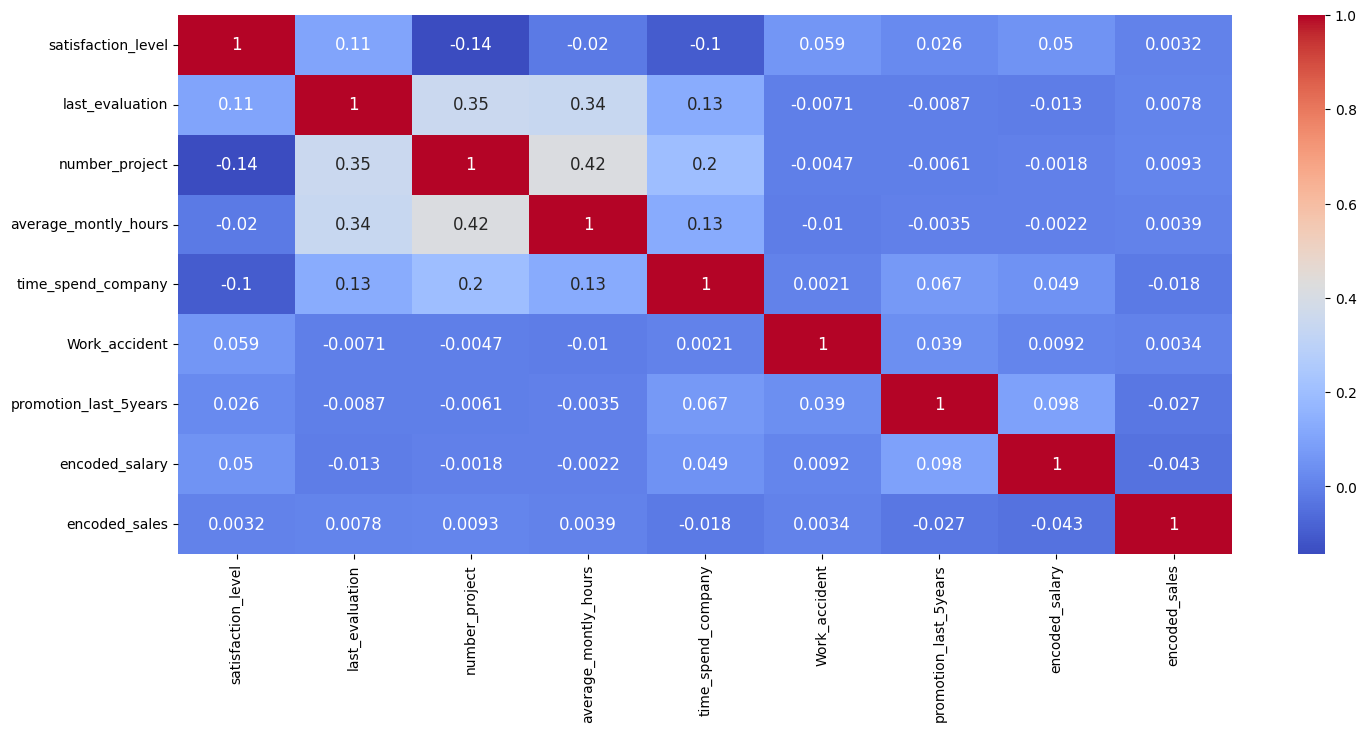

In [58]:
X=hr_df.select_dtypes(exclude=['object']).drop(['left'],axis=1)
y=hr_df['left']
plt.figure(figsize=(17,7))
sns.heatmap(X.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12});

In the correlation matrix, no data seems strongly correlated (Number_project and average_monthly_hours are slightly correlated).
Let's check the VIF index to make sure there is no multicolinearity.

In [59]:
X_scaled=X.copy()

for feature in X_scaled.columns:
    mu = X[feature].mean()
    sigma =X[feature].std()
    X_scaled[feature] = X_scaled[feature].apply(lambda x: (x-mu)/sigma)
    
df = pd.DataFrame()
df["features"] = X_scaled.select_dtypes(exclude = ["object"]).columns
df["vif_index"] = [vif(X_scaled.values, i) for i in range(X_scaled.shape[1])]
round(df.sort_values(by="vif_index", ascending = False),2)

,features,vif_index
2,number_project,1.35
3,average_montly_hours,1.28
1,last_evaluation,1.24
0,satisfaction_level,1.07
4,time_spend_company,1.06
6,promotion_last_5years,1.02
7,encoded_salary,1.02
5,Work_accident,1.01
8,encoded_sales,1.00


All vif index are inferior to 5 so we can considerate there is no multicolinearity for the various data.

# Statistical test

We can perform a logistic regression  to see the impact of the different explanatory variables

In [60]:
model1 = smf.logit(formula='left ~ 1', data=hr_df).fit();
print(model1.params)
model1.summary()

Optimization terminated successfully.
         Current function value: 0.548860
         Iterations 5
Intercept   -1.163221
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14998
Method:                           MLE   Df Model:                            0
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:               1.407e-10
Time:                        15:16:53   Log-Likelihood:                -8232.3
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1632      0.019    -60.675      0.000      -1.201      -1.126
==============================================================================
"""

The chance for anyone of leaving the company is 23% without any influence of the explanatory variables

In [61]:
X=sm.add_constant(X)
model1 = sm.Logit(y,X).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.431309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14989
Method:                           MLE   Df Model:                            9
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.2142
Time:                        15:16:53   Log-Likelihood:                -6469.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3209      0.128      2.512      0.012       0.071       0.571
satisfaction_level       -4.1307      0.098    -42.303      0.000      -4.322      -3.939
last_evaluation           0.7265      0.148      4.893      0.000       0.435       1.017
number_project           -0.3124      0.021    -14.755      0.000      -0.354      -0.271
average_montly_hours      0.0044      0.001      8.663      0.000       0.003       0.005
time_spend_company        0.2576      0.015     16.877      0.000       0.228       0.287
Work_accident            -1.5384      0.089    -17.193      0.000      -1.714      -1.363
promotion_last_5years    -1.5032      0.256     -5.862      0.000      -2.006      -1.001
encoded_salary           -0.6992      0.038    -18.471      0.000      -0.773      -0.625
encoded_sales             0.0303      0.008      3.904      0.000       0.015       0.046
=========================================================================================
"""

When we use all parameters to predict y, we have a R2 of 0.214 <br> We can see that the parameters that are more important for people leaving are in order of importance: <br> Satisfaction level, <br>Work accident, <br>promotion last 5 years, <br>last evaluation, <br>the salary, <br>number of project, <br>time spend company <br>and the rest have almost no influence

In [62]:
model2 = smf.logit(formula='left ~ satisfaction_level+promotion_last_5years+time_spend_company+Work_accident+encoded_salary+last_evaluation+number_project', data=hr_df).fit();
model2.summary()

Optimization terminated successfully.
         Current function value: 0.434345
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14991
Method:                           MLE   Df Model:                            7
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.2086
Time:                        15:16:53   Log-Likelihood:                -6514.7
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8705      0.111      7.852      0.000       0.653       1.088
satisfaction_level       -4.0907      0.097    -42.271      0.000      -4.280      -3.901
promotion_last_5years    -1.5382      0.256     -6.000      0.000      -2.041      -1.036
time_spend_company        0.2587      0.015     17.043      0.000       0.229       0.288
Work_accident            -1.5438      0.089    -17.287      0.000      -1.719      -1.369
encoded_salary           -0.7026      0.038    -18.641      0.000      -0.777      -0.629
last_evaluation           1.0363      0.144      7.216      0.000       0.755       1.318
number_project           -0.2377      0.019    -12.460      0.000      -0.275      -0.200
=========================================================================================
"""

When we put the 7 parameters that seems to influence most people to leave, we have a R2 of 0.208 which is not improving the model so we might want to use all explanatory variables.

# Feature engineering

Encoding have been done previously <br> We can use MinMaxScaler to scale the data for the modelling as it has not a lot of outlier and they seems (only for time spend in the company) and they need to be taken in account.

In [63]:
scaler = MinMaxScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

# Machine learning models

Train test split data in order to avoid data leakage and baseline score using logistic regression.<br> The metric that will be used is F1 metric to measure the model general performance. We don't use accuracy because we have an imbalanced dataset.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
baseline_score=cross_validate(model, X_train, y_train, scoring=['f1'], cv=20)
print(f"The baseline score for the model is {baseline_score['test_f1'].mean():.3f} for the F1 metric using logistic regression")


The baseline score for the model is 0.423 for the F1 metric using logistic regression


We will now test several models:

In [65]:
models = [('SupportVectorMachines',svm.SVC()),
('RandomForestClassifier',RandomForestClassifier(n_jobs=-1)),
('DecisionTreeClassifier', DecisionTreeClassifier()),
('AdaBoostClassifier', AdaBoostClassifier()),      
('KNeighborsClassifier',KNeighborsClassifier(n_jobs=-1)), 
('GradientBoostingClassifier',GradientBoostingClassifier()),
('GaussianNB', GaussianNB())]

scores = {}
for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, scoring=['f1'], cv=20)
    scores[name]=round(cv_results['test_f1'].mean(),4)

In [66]:
sorted_scores = sorted(scores.items(), key=lambda x:x[1],reverse=True)
sorted_scores

[('RandomForestClassifier', 0.9792),
 ('DecisionTreeClassifier', 0.9473),
 ('GradientBoostingClassifier', 0.9464),
 ('AdaBoostClassifier', 0.9151),
 ('KNeighborsClassifier', 0.8991),
 ('SupportVectorMachines', 0.8969),
 ('GaussianNB', 0.6355)]

The best model performing is Random Forest Classifier with a F1 score is 0.9799

# Model optimization

In [67]:
rfc=RandomForestClassifier(n_jobs=-1)

grid = {'n_estimators': [50,100,125,150,175,200],'class_weight':['balanced','balanced_subsample',None]}

search = GridSearchCV(
    rfc,
    grid, 
    scoring='f1',
    cv=5, n_jobs=-1
)

search.fit(X_train, y_train);

search.best_estimator_

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [68]:
final_model=RandomForestClassifier(n_estimators=175,n_jobs=-1)
res=cross_validate(final_model, X_train, y_train, scoring=['f1'], cv=20)
score=round(res["test_f1"].mean(),4)
print(f"the score after model optimization is {score}")

the score after model optimization is 0.9794


In [69]:
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)

pred=round(f1_score(y_test,y_pred),4)
print(f"The score on the unseen data is {pred} for the F1 which is quite good")

The score on the unseen data is 0.9808 for the F1 which is quite good


# Feature importance

In [70]:
ff_model = RandomForestClassifier(n_estimators=175,n_jobs=-1).fit(X_scaled, y) 

permutation_score = permutation_importance(ff_model, X_scaled, y, n_repeats=10) 

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
1,satisfaction_level,0.213801
4,average_montly_hours,0.135189
3,number_project,0.133722
2,last_evaluation,0.125908
5,time_spend_company,0.114601
9,encoded_sales,0.009914
8,encoded_salary,0.006287
6,Work_accident,0.002067
7,promotion_last_5years,0.0002
0,const,0.0


The most important features influencing the model are in order : Satisfaction level, Average monthly hours, Number projects, Last evaluation, Time spend company etc...

# Conclusion

## Why employees are leaving the company?

On this scatter plot, we can see three categories standing out of people who left the company: 
<br>1. People with high satisfaction level and a good last evaluation, they are probably performers that were recruited with more advantages 
<br>2. People with a low satisfaction level, a good last evaluation and around 6 projects, they are probably frustrated or overloaded
<br>3. People with a bad last evaluation with a middle satisfaction level but mainly 2 project only, maybe they are bored with not enough projects and need some motivation.

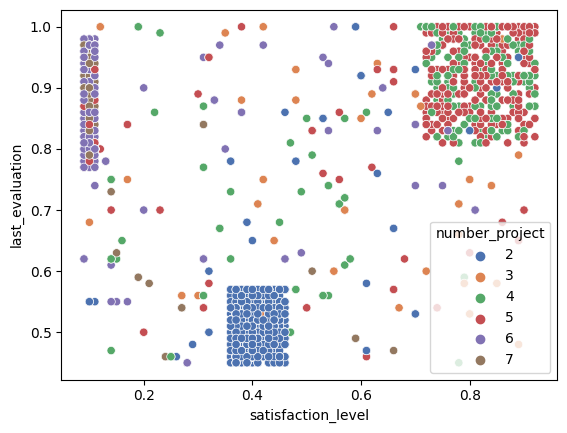

In [91]:
sns.scatterplot(data=left_people, x="satisfaction_level", y="last_evaluation", hue="number_project",palette='deep')
plt.show;

In [94]:
nb_left_people=hr_df.loc[hr_df['left']==1]['satisfaction_level'].count()
left_people_unsatisfied=hr_df.loc[hr_df['left']==1].loc[hr_df['satisfaction_level']<0.5]['satisfaction_level'].count()
percentage=round(100*left_people_unsatisfied/nb_left_people)
print(f"The Satisfaction Level : \nThe percentage of left people who were unsatisfied (less than 0.5 satisfaction level) is {percentage}% meaning that most people \n leaving are unsatisfied")

The Satisfaction Level : 
The percentage of left people who were unsatisfied (less than 0.5 satisfaction level) is 71% meaning that most people 
 leaving are unsatisfied


----- Distribution of last_evaluation of left people : -----


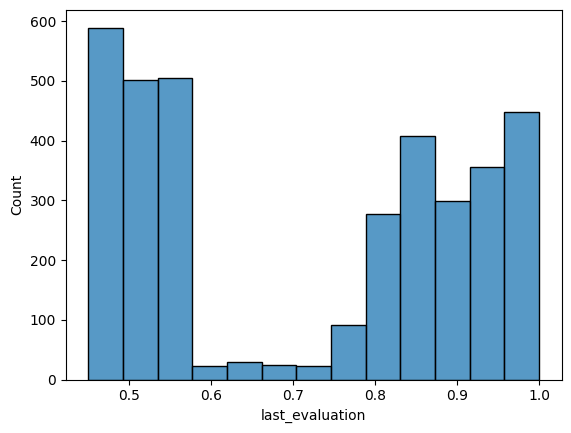

In [73]:
left_people=hr_df.loc[hr_df['left']==1]
print(f"----- Distribution of last_evaluation of left people : -----")
sns.histplot(x=left_people['last_evaluation'])
plt.show()

In [95]:
bad=left_people.loc[left_people["last_evaluation"]<0.6]["last_evaluation"].count()
good=left_people.loc[left_people["last_evaluation"]>0.8]["last_evaluation"].count()
percentage_bad=round(100*bad/nb_left_people)
percentage_good=round(100*good/nb_left_people)
print(f"The Last evaluation : \n {percentage_good+percentage_bad}% of people leaving are either good performers or bad performers")

The Last evaluation : 
 92% of people leaving are either good performers or bad performers


In [76]:
few_project=left_people.loc[left_people["number_project"]<3]["number_project"].count()
project=round(100*few_project/nb_left_people)
print(f"The Number of projects : \nThe percentage of left people who were having less than 3 projects is {project}%")

The Number of projects : 
The percentage of left people who were having less than 3 projects is 44%


----- Distribution of the average monthly hours of left people : -----


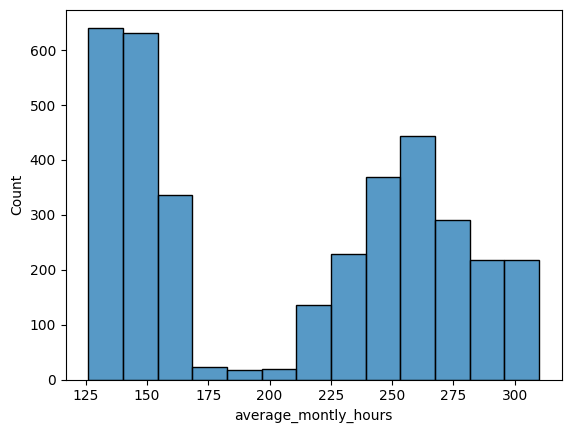

In [77]:
left_people=hr_df.loc[hr_df['left']==1]
print(f"----- Distribution of the average monthly hours of left people : -----")
sns.histplot(x=left_people['average_montly_hours'])
plt.show()

In [78]:
amh_big=left_people.loc[left_people["average_montly_hours"]>225]["average_montly_hours"].count()
amh_low=left_people.loc[left_people["average_montly_hours"]<170]["average_montly_hours"].count()
big=round(100*amh_big/nb_left_people)
low=round(100*amh_low/nb_left_people)
print(f"The Average monthly hours : \n{big}% of people who left the company were working between 10 to 14 hours per day \nAnd {low}% of people who left the company were working less than 8h hours per day")

The Average monthly hours : 
49% of people who left the company were working between 10 to 14 hours per day 
And 45% of people who left the company were working less than 8h hours per day


## Who will be the next ones

Now, that we identified categories of people leaving, let's predict the next people who will be leaving.

In [79]:
y_pred=pd.DataFrame(ff_model.predict(X),columns=["prediction"])
hr_df_pred=pd.concat([hr_df,y_pred],axis=1)

In [84]:
future_leaving=hr_df_pred.loc[(hr_df_pred['left']==0)&(hr_df_pred['prediction']==1)]
print(f"About {future_leaving['prediction'].count()} people are identified by the model as a potential future people leaving the company")

About 6683 people are identified by the model as a potential future people leaving the company


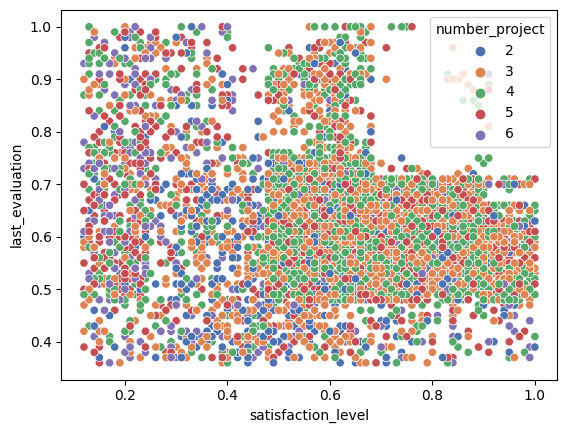

In [96]:
sns.scatterplot(data=future_leaving, x="satisfaction_level", y="last_evaluation", hue="number_project",palette='deep')
plt.show;

## Proposed action plan

The proposed action plan to try to retain those persons is: <br>
<br>1. Look into details the satisfaction survey in order to identify reasons of their unsatisfaction 
<br>2. Trying to retain performers by understanding what they need to stay (promotion?)
<br>3. Trying to reduced overloaded people that have more than 5 projects
<br>4. For the people with not a good last evaluation and 2 projects, trying to give them more projects and to understand what could motivate them best (more or less hours? promotion?)
<br>4. In terms of data science, threshold can be fine-tuned in order to refined the number of people who might be leaving next.